### Which Programming Language Most Desire Next Year

Now you have had a closer look at the data, and you saw how I approached looking at how the survey respondents think you should choose the most desire programming language next year. Let's recreate those results, as well as take a look at another question.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Now to look at our first question of interest: Which programming language is the most desire in the next year? Looking at the LanguageDesireNextYear field, you can see what programming language these individuals would suggest to work with in the next year. Below you can take a look at the full field that survey participants would see.

In [2]:
list(schema[schema.Column == 'LanguageDesireNextYear']['QuestionText'])

['Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

In [3]:
#Let's have a look at what the participants say
study = df['LanguageDesireNextYear'].value_counts().reset_index()
study.head()

,index,LanguageDesireNextYear
0,Python,1236
1,HTML/CSS;JavaScript,697
2,HTML/CSS;JavaScript;TypeScript,648
3,C#,607
4,Java,584


In [4]:
# Oh this isn't what I was expecting, it is grouping items together if a participant provided 
# more than just one answer.  Let's see if we can clean this up.
# first to change this index column to a more appropriate name
study.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
study.head()

,language,count
0,Python,1236
1,HTML/CSS;JavaScript,697
2,HTML/CSS;JavaScript;TypeScript,648
3,C#,607
4,Java,584


A quick look through data, allows us to create a list of all of the individual programming language marked by a user.

In [5]:
# Here is a list of the different answers provided
possible_vals = ["Python", "HTML/CSS", 
                 "JavaScript", "TypeScript", "C#",
                 "Java", "SQL", "PHP",
                 "Go", "Swift",
                 "C++", "R","Bash/Shell/PowerShell","Scala","Rust", "Dart", "Kotlin",
                 "WebAssembly", "Clojure", "Elixir", "Erlang","Assembly", "C", "Other(s):"
                ]

In [6]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

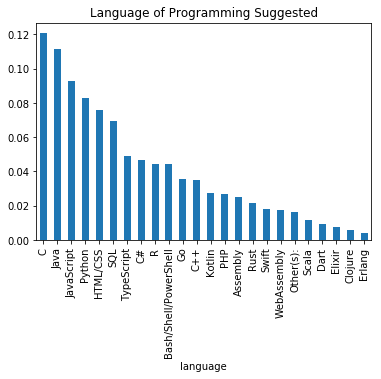

In [8]:
def clean_and_plot(df, title='Language of Programming Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the LanguageDesireNextYear column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the LanguageDesireNextYear column.
    '''
    study = df['LanguageDesireNextYear'].value_counts().reset_index()
    study.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
    study_df = total_count(study, 'language', 'count', possible_vals)

    study_df.set_index('language', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

We might want to take this one step further and say we care more about the methods that are suggested by those who earn more, or those who have higher job satisfaction. Let's take a stab at incorporating that into this analysis.

In [7]:
# let's rewrite part of this function to get the mean work hours for each language

def mean_amt(df, col_name, col_mean, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col_name - the column name you want to look through
    col_count - the column you want to count values from
    col_mean - the column you want the mean amount for
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    df_all - holds sum, square, total, mean, variance, and standard deviation for the col_mean
    '''
    new_df = defaultdict(int)
    squares_df = defaultdict(int)
    denoms = dict()
    for val in look_for:
        denoms[val] = 0
        for idx in range(df.shape[0]):
            if df[col_name].isnull()[idx] == False:
                if val in df[col_name][idx] and df[col_mean][idx] > 0:
                    new_df[val] += df[col_mean][idx]
                    squares_df[val] += df[col_mean][idx]**2 #Needed to understand the spread
                    denoms[val] += 1 
    
    # Turn into dataframes
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    squares_df = pd.DataFrame(pd.Series(squares_df)).reset_index()
    denoms = pd.DataFrame(pd.Series(denoms)).reset_index()
    
    # Change the column names
    new_df.columns = [col_name, 'col_sum']
    squares_df.columns = [col_name, 'col_squares']
    denoms.columns = [col_name, 'col_total']
    
    # Merge dataframes
    df_means = pd.merge(new_df, denoms)
    df_all = pd.merge(df_means, squares_df)
    
    # Additional columns needed for analysis
    df_all['mean_col'] = df_means['col_sum']/df_means['col_total']
    df_all['var_col'] = df_all['col_squares']/df_all['col_total'] - df_all['mean_col']**2
    df_all['std_col'] = np.sqrt(df_all['var_col'])
    df_all['lower_95'] = df_all['mean_col'] - 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    df_all['upper_95'] = df_all['mean_col'] + 1.96*df_all['std_col']/np.sqrt(df_all['col_total'])
    return df_all

In [9]:
df_workhrs_all = mean_amt(df, 'LanguageDesireNextYear', 'WorkWeekHrs', possible_vals)

# To get a simple answer to our questions - see these two tables.

df_workhrs_all.sort_values('mean_col', ascending=True)

,LanguageDesireNextYear,col_sum,col_total,col_squares,mean_col,var_col,std_col,lower_95,upper_95
15,Dart,14984.00,364,8.040140e+05,41.164835,514.286016,22.677875,38.835094,43.494577
9,Swift,29783.00,718,1.490492e+06,41.480501,355.262851,18.848418,40.101805,42.859198
1,HTML/CSS,128683.55,3099,6.640898e+06,41.524217,418.655642,20.461076,40.803817,42.244618
11,R,77898.30,1870,3.981543e+06,41.656845,393.874445,19.846270,40.757318,42.556372
14,Rust,38935.50,932,2.120775e+06,41.776288,530.251321,23.027187,40.297898,43.254677
8,Go,62465.75,1494,3.213519e+06,41.811078,402.783293,20.069462,40.793385,42.828770
0,Python,130666.30,3120,7.079997e+06,41.880224,515.276532,22.699703,41.083700,42.676749
13,Scala,21072.75,503,1.065750e+06,41.894135,363.669334,19.070116,40.227558,43.560712
10,C++,48486.20,1157,2.771956e+06,41.906828,639.630831,25.290924,40.449511,43.364145
22,C,202204.50,4803,1.133132e+07,42.099625,586.838286,24.224745,41.414517,42.784733


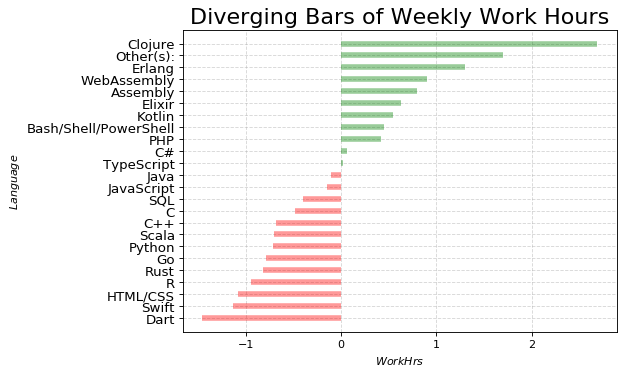

In [10]:
# Prepare Data
x = df_workhrs_all.loc[:, ['mean_col']]
df_workhrs_all['workhrs_z'] = (x - x.mean())/x.std()
df_workhrs_all['colors'] = ['red' if x < 0 else 'green' for x in df_workhrs_all['workhrs_z']]
df_workhrs_all.sort_values('workhrs_z', inplace=True)
df_workhrs_all.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(7,5), dpi= 80)
plt.hlines(y=df_workhrs_all.index, xmin=0, xmax=df_workhrs_all.workhrs_z, color=df_workhrs_all.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Language$', xlabel='$WorkHrs$')
plt.yticks(df_workhrs_all.index, df_workhrs_all.LanguageDesireNextYear, fontsize=12)
plt.title('Diverging Bars of Weekly Work Hours', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [11]:
def higher_code_years(code_year_str):
    '''
    INPUT
        code_year_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the code_year_string is not null and can not covert to int that is larger than 10
        return 0 otherwise
    
    '''

    result = 0
    
    try:
        years = int(code_year_str)
        if years > 10:
            return 1
        else:
            return 0
    except:
        return 0


# df["YearsCode"].apply(higher_code_years)[:5] #Test your function to assure it provides 1 and 0 values for the df

In [12]:
df['HigherCodeYears'] = df["YearsCode"].apply(higher_code_years)
code_years_1 = df[df['HigherCodeYears'] == 1]# Subset df to only those with HigherCodeYears of 1
code_years_0 = df[df['HigherCodeYears'] == 0]# Subset df to only those with HigherCodeYears of 0


# print(code_years_1['HigherCodeYears'][:5]) #Assure it looks like what you would expect
# print(code_years_0['HigherCodeYears'][:5]) #Assure it looks like what you would expect

In [13]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

code_years_1_perc = clean_and_plot(code_years_1, 'Higher Code Years Education', plot=False)
code_years_0_perc = clean_and_plot(code_years_0, 'Max of 10 Code Years ', plot=False)

comp_df = pd.merge(code_years_1_perc, code_years_0_perc, left_index=True, right_index=True)
comp_df.columns = ['code_years_1_perc', 'code_years_0_perc']
comp_df['Diff_HigherCodeYears_Vals'] = comp_df['code_years_1_perc'] - comp_df['code_years_0_perc']
comp_df.style.bar(subset=['Diff_HigherCodeYears_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,code_years_1_perc,code_years_0_perc,Diff_HigherCodeYears_Vals
language,,,
C,0.121648,0.120231,0.00141696
Java,0.105459,0.115884,-0.0104245
JavaScript,0.0889558,0.0953222,-0.00636635
HTML/CSS,0.0755463,0.0762326,-0.000686267
SQL,0.073068,0.0671686,0.00589937
Python,0.0721519,0.0903181,-0.0181662
TypeScript,0.0516636,0.047446,0.00421756
C#,0.050946,0.0434945,0.00745152
Bash/Shell/PowerShell,0.0504829,0.0398053,0.0106777
